#Datasource

In [5]:
import pandas as pd

from google.colab import drive
drive.mount('/content/gdrive')

train_data = pd.read_csv('gdrive/My Drive/256_Project/train.csv')
test_data = pd.read_csv('gdrive/My Drive/256_Project/test.csv')

train_data.head(5)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


#Feature Engineering

In [6]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

###No of Words in Tweets

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.tokenize import RegexpTokenizer
import re
from textblob import TextBlob
from wordcloud import WordCloud, STOPWORDS
import numpy as np 
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
from wordcloud import WordCloud
from string import punctuation
import pickle

print("\n Word Counts in Tweets \n")
train_data['tweet_length']= train_data['text'].apply(lambda x: len(x.split()))


train_data.head(5)


 Word Counts in Tweets 



,id,keyword,location,text,target,tweet_length
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,13
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,7
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,22
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,8
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,16


###No of Sentences in Tweets

In [8]:
print("\n Sentence Counts in Tweets \n")
train_data['sent_count'] = train_data['text'].apply(lambda x : len(sent_tokenize(x))) 

train_data.head(5)


 Sentence Counts in Tweets 



,id,keyword,location,text,target,tweet_length,sent_count
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,13,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,7,2
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,22,2
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,8,1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,16,1


###No of Punctuations in Tweets

In [9]:
train_data['punct_count'] = train_data['text'].apply(lambda x : len(word_tokenize(x))-len(x.split())) 

print("\n Punctuation Counts in Tweets \n")
train_data.head(5)


 Punctuation Counts in Tweets 



,id,keyword,location,text,target,tweet_length,sent_count,punct_count
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,13,1,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,7,2,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,22,2,2
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,8,1,1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,16,1,2


###No of Hashtags in Tweets

In [10]:
train_data['hashtags'] = train_data['text'].apply(lambda x :  word_tokenize(x).count('#'))

print("\n Hashtag Counts in Tweets \n")
train_data.head(5)


 Hashtag Counts in Tweets 



,id,keyword,location,text,target,tweet_length,sent_count,punct_count,hashtags
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,13,1,1,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,7,2,1,0
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,22,2,2,0
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,8,1,1,1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,16,1,2,2


###Word Count Without Stopwords in Tweets

In [11]:
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english')) 
tokenizer = RegexpTokenizer(r'\w+')

train_data['text_no_stop'] = train_data['text'].apply(lambda x : len([w for w in tokenizer.tokenize(x) if not w in stop_words]))

print("\n Tweets Without Stopwords \n")
train_data.head(5)


 Tweets Without Stopwords 



,id,keyword,location,text,target,tweet_length,sent_count,punct_count,hashtags,text_no_stop
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,13,1,1,1,8
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,7,2,1,0,7
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,22,2,2,0,13
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,8,1,1,1,8
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,16,1,2,2,10


###Cleaning Tweets

In [12]:
def clean_tweets(x):
    text = re.sub('https?://[A-Za-z0-9./]+','',x)
    text = re.sub(r"\n","",text)
    text = text.lower()
    text = re.sub(r"\d","",text)        #Remove digits
    text = re.sub(r'[^\x00-\x7f]',r' ',text) # remove non-ascii
    text = re.sub(r'[^\w\s]','',text) #Remove punctuation
    text = re.sub(r'http\S+|www.\S+', '', text) #Remove http
    return text

train_data['clean_tweet'] = train_data['text'].apply(lambda x: clean_tweets(x))
test_data['clean_tweet'] = test_data['text'].apply(lambda x: clean_tweets(x))

print("\n Cleaned Tweets \n")
train_data.head(5)



 Cleaned Tweets 



,id,keyword,location,text,target,tweet_length,sent_count,punct_count,hashtags,text_no_stop,clean_tweet
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,13,1,1,1,8,our deeds are the reason of this earthquake ma...
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,7,2,1,0,7,forest fire near la ronge sask canada
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,22,2,2,0,13,all residents asked to shelter in place are be...
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,8,1,1,1,8,people receive wildfires evacuation orders in...
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,16,1,2,2,10,just got sent this photo from ruby alaska as s...


In [13]:
!pip install vaderSentiment

     |████████████████████████████████| 133kB 3.3MB/s 


###Polarity Scores for Tweets

In [14]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

sia = SentimentIntensityAnalyzer()

train_data['sentiment_score'] = train_data['clean_tweet'].apply(lambda x: sia.polarity_scores(x)['compound'])

train_data['sentiment']="A"
Condition = [(train_data['sentiment_score']>=0.05),((train_data['sentiment_score'] < 0.05) & (train_data['sentiment_score'] > -0.05 ))]
choices = ['Positive','Neutral']
train_data['sentiment'] = np.select(Condition,choices,default='Negative')

print("\n Sentiment Polarity Scores on Tweets \n")
train_data.head(5)


 Sentiment Polarity Scores on Tweets 



,id,keyword,location,text,target,tweet_length,sent_count,punct_count,hashtags,text_no_stop,clean_tweet,sentiment_score,sentiment
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,13,1,1,1,8,our deeds are the reason of this earthquake ma...,0.2732,Positive
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,7,2,1,0,7,forest fire near la ronge sask canada,-0.3400,Negative
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,22,2,2,0,13,all residents asked to shelter in place are be...,-0.2960,Negative
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,8,1,1,1,8,people receive wildfires evacuation orders in...,0.0000,Neutral
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,16,1,2,2,10,just got sent this photo from ruby alaska as s...,0.0000,Neutral


#EDA on Tweets

### Sent counts, Hastags, Sentiment on Disaster & Non Disaster Tweets

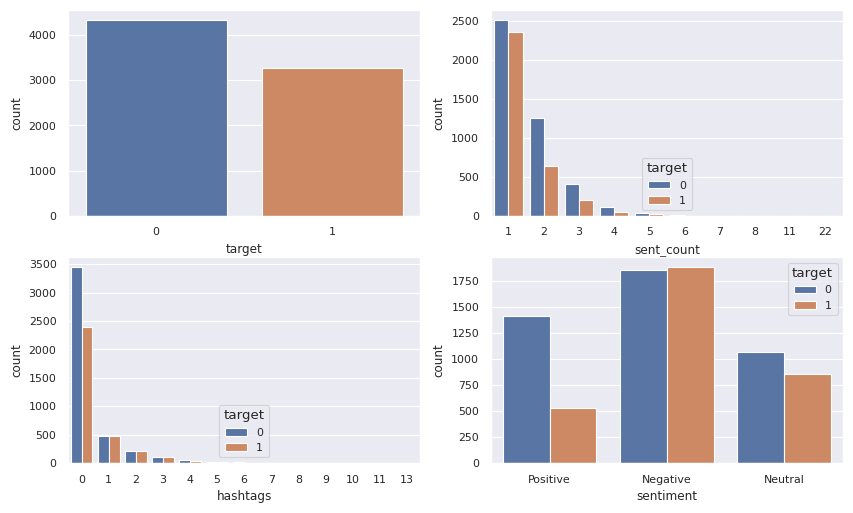

In [15]:
sns.set(style='darkgrid', rc={"grid.linewidth": 0.2})
sns.set_context("paper", font_scale=0.9)
fig, axes = plt.subplots(nrows=2, ncols=2,figsize=(10,6), dpi=100)

sns.countplot(x='target',data=train_data,ax=axes[0][0])
sns.countplot(x='sent_count',data=train_data,ax=axes[0][1],hue='target')

sns.countplot(x='hashtags',data=train_data,ax=axes[1][0],hue='target')
sns.countplot(x='sentiment',data=train_data,ax=axes[1][1],hue ='target') #, palette="Set2"
fig.savefig("target_hashtag_sentcount_senti.pdf")

###Most Common Words on Disaster & Non Disaster Tweets


 Most Common Words in Non-Disaster And Disaster Tweets 



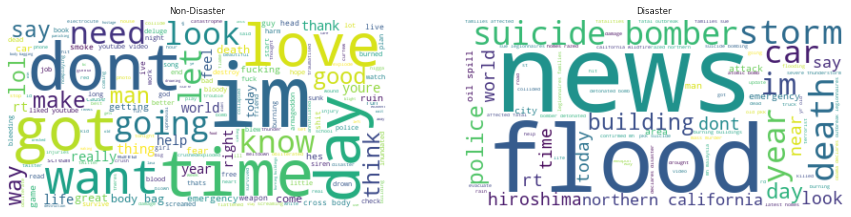

In [16]:
stop = set(stopwords.words('english'))
stop = ENGLISH_STOP_WORDS.union(stop) 

def wc_words(target):
    words = [word.lower() for tweet in train_data[train_data.target == target].clean_tweet for word in tweet.split()]
    words = list(filter(lambda w: w != 'like', words))
    words = list(filter(lambda w: w != 'new', words))
    words = list(filter(lambda w: w != 'people', words))
    words = list(filter(lambda w: w != 'amp', words))
    words = ' '.join(words)
    my_cloud = WordCloud(background_color='white', stopwords=stop).generate(words)

    fig1 = plt.subplot(1,2,target+1)
    plt.imshow(my_cloud, interpolation='bilinear') 
    plt.axis("off")


print("\n Most Common Words in Non-Disaster And Disaster Tweets \n")
plt.figure(figsize=(15,4))
wc_words(0)
plt.title('Non-Disaster')
wc_words(1)
plt.title('Disaster')

plt.savefig("most_common_words.pdf")

###Tweets Length & Punctuations on Disaster & Non Disaster Tweets

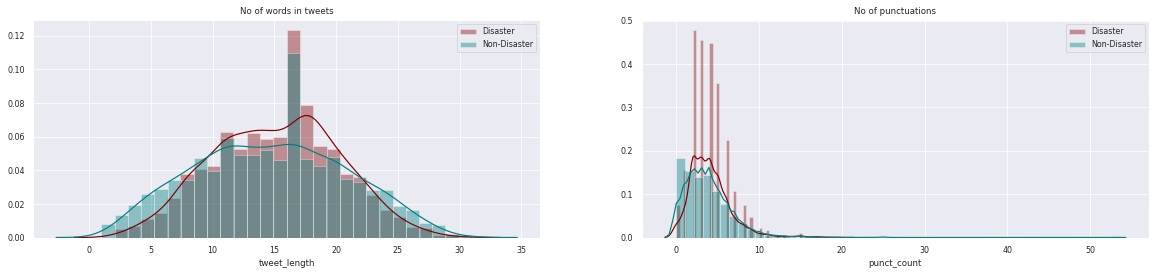

In [17]:
plot_cols = ['tweet_length','punct_count']
plot_titles = ['No of words in tweets', "No of punctuations"]

plt.figure(figsize=(20,4))
for counter, i in enumerate([0,1]):
    plt.subplot(1,2, counter+1)
    sns.distplot(train_data[train_data.target == 1][plot_cols[i]], label='Disaster', color="maroon").set_title(plot_titles[i])
    sns.distplot(train_data[train_data.target == 0][plot_cols[i]], label='Non-Disaster', color="teal")
    plt.legend()
    plt.savefig("tweet_len_punct_count.pdf")

#Scikit Classifiers

In [18]:
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

tweets_train_clean = train_data['clean_tweet']
tweets_test_clean = test_data['clean_tweet']


###Stopwords

In [19]:
from nltk.corpus import stopwords

english_stop_words = stopwords.words('english')
def remove_stop_words(corpus):
    removed_stop_words = []
    for review in corpus:
        removed_stop_words.append(
            ' '.join([word for word in review.split() 
                      if word not in english_stop_words])
        )
    return removed_stop_words

no_stop_words_train = remove_stop_words(tweets_train_clean)
no_stop_words_test = remove_stop_words(tweets_test_clean)

###Stemming Tweets Data

In [20]:
def get_stemmed_text(corpus):
    from nltk.stem.porter import PorterStemmer
    stemmer = PorterStemmer()
    return [' '.join([stemmer.stem(word) for word in review.split()]) for review in corpus]

stemmed_tweets_train = get_stemmed_text(no_stop_words_train)
stemmed_tweets_test = get_stemmed_text(no_stop_words_test)

###Lemmatizing Tweets Data

In [21]:
def get_lemmatized_text(corpus):
    from nltk.stem import WordNetLemmatizer
    lemmatizer = WordNetLemmatizer()
    return [' '.join([lemmatizer.lemmatize(word) for word in review.split()]) for review in corpus]

lemmatized_tweets_train = get_lemmatized_text(stemmed_tweets_train)
lemmatized_tweets_test = get_lemmatized_text(stemmed_tweets_test)

###Applying Various Classifiers on Train Data 

In [98]:
from sklearn.feature_extraction.text import CountVectorizer

from nltk.classify.scikitlearn import SklearnClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression,SGDClassifier
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier, RandomForestClassifier

from sklearn.metrics import accuracy_score, classification_report, f1_score, roc_curve, recall_score, precision_score, auc, roc_auc_score
from sklearn.model_selection import train_test_split

ngram_vectorizer = CountVectorizer(binary=True, ngram_range=(1, 2))
ngram_vectorizer.fit(lemmatized_tweets_train)
X = ngram_vectorizer.transform(lemmatized_tweets_train)
X_test = ngram_vectorizer.transform(lemmatized_tweets_test)

X_train, X_val, y_train, y_val = train_test_split(X, train_data['target'], train_size = 0.80)

algorithms = ['LogReg', 'MNB', 'DecisionTree', 'KNeighbor', 'RandomForest', 'Ensemble', 'SimpleRNN', 'LSTM']
accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []

# for c in [0.01, 0.05, 0.25, 0.5, 1]:
logreg = LogisticRegression(C=0.25)
logreg.fit(X_train, y_train)
logreg_report = classification_report(y_val, logreg.predict(X_val))
logreg_report1 = classification_report(y_val, logreg.predict(X_val), output_dict=True)
print ("Classification Report of Logistic Regression:\n" , logreg_report)
accuracy_scores.append(logreg_report1['accuracy'])
precision_scores.append(logreg_report1['weighted avg']['precision'])
recall_scores.append(logreg_report1['weighted avg']['recall'])
f1_scores.append(logreg_report1['weighted avg']['f1-score'])


mnb = MultinomialNB()
mnb.fit(X_train, y_train)
mnb_report = classification_report(y_val, mnb.predict(X_val))
mnb_report1 = classification_report(y_val, mnb.predict(X_val), output_dict=True)
print ("Classification Report of MultinomialNB:\n" , mnb_report)
accuracy_scores.append(mnb_report1['accuracy'])
precision_scores.append(mnb_report1['weighted avg']['precision'])
recall_scores.append(mnb_report1['weighted avg']['recall'])
f1_scores.append(mnb_report1['weighted avg']['f1-score'])


decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)
decision_tree_report = classification_report(y_val, decision_tree.predict(X_val))
decision_tree_report1 = classification_report(y_val, decision_tree.predict(X_val), output_dict=True)
print ("Classification Report of Decision Tree:\n" , decision_tree_report)
accuracy_scores.append(decision_tree_report1['accuracy'])
precision_scores.append(decision_tree_report1['weighted avg']['precision'])
recall_scores.append(decision_tree_report1['weighted avg']['recall'])
f1_scores.append(decision_tree_report1['weighted avg']['f1-score'])


kneighbor = KNeighborsClassifier()
kneighbor.fit(X_train, y_train)
kneighbor_report = classification_report(y_val, kneighbor.predict(X_val))
kneighbor_report1 = classification_report(y_val, kneighbor.predict(X_val), output_dict=True)
print ("Classification Report of K Neighbor:\n" , kneighbor_report)
accuracy_scores.append(kneighbor_report1['accuracy'])
precision_scores.append(kneighbor_report1['weighted avg']['precision'])
recall_scores.append(kneighbor_report1['weighted avg']['recall'])
f1_scores.append(kneighbor_report1['weighted avg']['f1-score'])


random_forest = RandomForestClassifier()
random_forest.fit(X_train, y_train)
random_forest_report = classification_report(y_val, random_forest.predict(X_val))
random_forest_report1 = classification_report(y_val, random_forest.predict(X_val), output_dict=True)
print ("Classification Report of Random Forest:\n" , random_forest_report)
accuracy_scores.append(random_forest_report1['accuracy'])
precision_scores.append(random_forest_report1['weighted avg']['precision'])
recall_scores.append(random_forest_report1['weighted avg']['recall'])
f1_scores.append(random_forest_report1['weighted avg']['f1-score'])

Classification Report of Logistic Regression:
               precision    recall  f1-score   support

           0       0.75      0.91      0.82       834
           1       0.86      0.63      0.73       689

    accuracy                           0.79      1523
   macro avg       0.80      0.77      0.78      1523
weighted avg       0.80      0.79      0.78      1523

Classification Report of MultinomialNB:
               precision    recall  f1-score   support

           0       0.80      0.83      0.81       834
           1       0.78      0.74      0.76       689

    accuracy                           0.79      1523
   macro avg       0.79      0.79      0.79      1523
weighted avg       0.79      0.79      0.79      1523

Classification Report of Decision Tree:
               precision    recall  f1-score   support

           0       0.73      0.84      0.78       834
           1       0.76      0.62      0.68       689

    accuracy                           0.74      1523

###Ensemble of Classifiers

In [99]:
estimators=[('mnb', mnb), ('logreg', logreg), ('decision_tree', decision_tree), ('kneighbor', kneighbor), ('random_forest', random_forest)]
ensemble = VotingClassifier(estimators, voting='soft')

ensemble.fit(X_train, y_train)
ensemble_report = classification_report(y_val, ensemble.predict(X_val))
ensemble_report1 = classification_report(y_val, ensemble.predict(X_val), output_dict=True)
print ("Classification Report of Ensemble of Classifier Models:\n" , ensemble_report )
accuracy_scores.append(ensemble_report1['accuracy'])
precision_scores.append(ensemble_report1['weighted avg']['precision'])
recall_scores.append(ensemble_report1['weighted avg']['recall'])
f1_scores.append(ensemble_report1['weighted avg']['f1-score'])

Classification Report of Ensemble of Classifier Models:
               precision    recall  f1-score   support

           0       0.74      0.93      0.82       834
           1       0.87      0.61      0.72       689

    accuracy                           0.78      1523
   macro avg       0.81      0.77      0.77      1523
weighted avg       0.80      0.78      0.78      1523



In [100]:
print("accuracy_scores: ",accuracy_scores)
print("precision_scores: ",precision_scores)
print("f1_scores: ",f1_scores)
print("recall_scores: ",recall_scores)

accuracy_scores:  [0.7866053841103086, 0.7912015758371634, 0.7399868680236376, 0.6165462902166776, 0.7636244254760342, 0.7839789888378201]
precision_scores:  [0.7993845783654294, 0.7909289807768826, 0.7428015310677238, 0.6895227024852124, 0.785572476725664, 0.801326415892425]
f1_scores:  [0.7809162185674687, 0.7905664232406959, 0.7359396970286344, 0.5464963735345537, 0.753849655906717, 0.7769242310030868]
recall_scores:  [0.7866053841103086, 0.7912015758371634, 0.7399868680236376, 0.6165462902166776, 0.7636244254760342, 0.7839789888378201]


###ROC Curve for Various Classifiers


 ROC Curve 



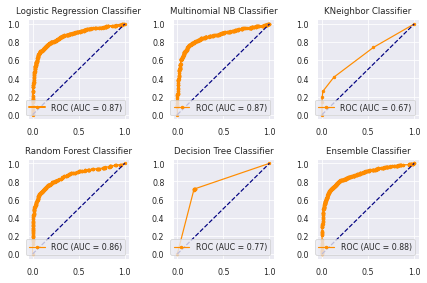

In [24]:
from sklearn.calibration import CalibratedClassifierCV

l_fpr, l_tpr, _ = roc_curve(y_val, logreg.predict_proba(X_val)[:,1])
l_auc_score = roc_auc_score(y_val, logreg.predict_proba(X_val)[:,1])

m_fpr, m_tpr, _ = roc_curve(y_val, mnb.predict_proba(X_val)[:,1])
m_auc_score = roc_auc_score(y_val,mnb.predict_proba(X_val)[:,1])

dt_fpr, dt_tpr, _ = roc_curve(y_val, decision_tree.predict_proba(X_val)[:,1])
dt_auc_score = roc_auc_score(y_val, decision_tree.predict_proba(X_val)[:,1])

kn_fpr, kn_tpr, _ = roc_curve(y_val, kneighbor.predict_proba(X_val)[:,1])
kn_auc_score = roc_auc_score(y_val, kneighbor.predict_proba(X_val)[:,1])

rf_fpr, rf_tpr, _ = roc_curve(y_val, random_forest.predict_proba(X_val)[:,1])
rf_auc_score = roc_auc_score(y_val, random_forest.predict_proba(X_val)[:,1])

en_fpr, en_tpr, _ = roc_curve(y_val, ensemble.predict_proba(X_val)[:,1])
en_auc_score = roc_auc_score(y_val, ensemble.predict_proba(X_val)[:,1])

print("\n ROC Curve \n")

fig, axs = plt.subplots(2, 3)

axs[0,0].set_title('Logistic Regression Classifier')
axs[0,0].plot(l_fpr, l_tpr, color='darkorange', lw=2, label='ROC (AUC = %0.2f)' % l_auc_score, marker='.')
axs[0,0].plot([0, 1], [0, 1], color='navy', linestyle='--')
axs[0,0].legend(loc='lower right')

axs[0,1].set_title('Multinomial NB Classifier')
axs[0,1].plot(m_fpr, m_tpr, color='darkorange', label='ROC (AUC = %0.2f)' % m_auc_score, marker='.')
axs[0,1].plot([0, 1], [0, 1], color='navy', linestyle='--')
axs[0,1].legend(loc='lower right')

axs[0,2].set_title('KNeighbor Classifier')
axs[0,2].plot(kn_fpr, kn_tpr, color='darkorange', label='ROC (AUC = %0.2f)' % kn_auc_score, marker='.')
axs[0,2].plot([0, 1], [0, 1], color='navy', linestyle='--')
axs[0,2].legend(loc='lower right')

axs[1,0].set_title('Random Forest Classifier')
axs[1,0].plot(rf_fpr, rf_tpr, color='darkorange', label='ROC (AUC = %0.2f)' % rf_auc_score, marker='.')
axs[1,0].plot([0, 1], [0, 1], color='navy', linestyle='--')
axs[1,0].legend(loc='lower right')

axs[1,1].set_title('Decision Tree Classifier')
axs[1,1].plot(dt_fpr, dt_tpr, color='darkorange', label='ROC (AUC = %0.2f)' % dt_auc_score, marker='.')
axs[1,1].plot([0, 1], [0, 1], color='navy', linestyle='--')
axs[1,1].legend(loc='lower right')

axs[1,2].set_title('Ensemble Classifier')
axs[1,2].plot(en_fpr, en_tpr, color='darkorange', label='ROC (AUC = %0.2f)' % en_auc_score, marker='.')
axs[1,2].plot([0, 1], [0, 1], color='navy', linestyle='--')
axs[1,2].legend(loc='lower right')

# axs.set_xlabel('False Positive Rate')
# axs.set_ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.tight_layout()
plt.savefig("roc_curve.pdf")
plt.show()

###Confusion Matrix for Various Classifiers

In [25]:
from sklearn.metrics import confusion_matrix

print("Confusion Matrix for Logistic Regression: \n",confusion_matrix(y_val, logreg.predict(X_val)))
print("Confusion Matrix for Multinomial NB Classifier: \n",confusion_matrix(y_val, mnb.predict(X_val)))
print("Confusion Matrix for Decision Tree Classifier: \n",confusion_matrix(y_val, decision_tree.predict(X_val)))
print("Confusion Matrix for Random Forest Classifier: \n",confusion_matrix(y_val, random_forest.predict(X_val)))
print("Confusion Matrix for K-Neighbor Classifier: \n",confusion_matrix(y_val, kneighbor.predict(X_val)))
print("Confusion Matrix for Ensemble Classifiers: \n",confusion_matrix(y_val, ensemble.predict(X_val)))

Confusion Matrix for Logistic Regression: 
 [[792  85]
 [192 454]]
Confusion Matrix for Multinomial NB Classifier: 
 [[726 151]
 [135 511]]
Confusion Matrix for Decision Tree Classifier: 
 [[720 157]
 [186 460]]
Confusion Matrix for Random Forest Classifier: 
 [[818  59]
 [225 421]]
Confusion Matrix for K-Neighbor Classifier: 
 [[869   8]
 [480 166]]
Confusion Matrix for Ensemble Classifiers: 
 [[805  72]
 [198 448]]


#Neural Network Models

In [26]:
import tensorflow as tf
print("GPU Available: ", tf.test.is_gpu_available())
print("Tensorflow version: ", tf.__version__)
print("Keras Version: ", tf.keras.__version__)

try:
  tpu = tf.distribute.cluster_resolver.TPUClusterResolver()
  tf.config.experimental_connect_to_cluster(tpu)
  tf.tpu.experimental.initialize_tpu_system(tpu)
  strategy = tf.distribute.experimental.TPUStrategy(tpu)
except ValueError:
  strategy = tf.distribute.get_strategy()

print("Number of accelerators: ", strategy.num_replicas_in_sync)
num_replicas = strategy.num_replicas_in_sync

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.
GPU Available:  False
Tensorflow version:  2.3.0
Keras Version:  2.4.0
INFO:tensorflow:Initializing the TPU system: grpc://10.94.45.226:8470


INFO:tensorflow:Initializing the TPU system: grpc://10.94.45.226:8470


INFO:tensorflow:Clearing out eager caches


INFO:tensorflow:Clearing out eager caches


INFO:tensorflow:Finished initializing TPU system.


INFO:tensorflow:Finished initializing TPU system.


INFO:tensorflow:Found TPU system:


INFO:tensorflow:Found TPU system:


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


Number of accelerators:  8


In [27]:
# import pandas as pd

# from google.colab import drive
# drive.mount('/content/gdrive')

# train_data = pd.read_csv('gdrive/My Drive/256_Project/train.csv')
# test_data = pd.read_csv('gdrive/My Drive/256_Project/test.csv')

# train_data.head(5)

###GloVe Embeddings

In [28]:
# load the GloVe vectors in a dictionary:
from tqdm import tqdm
import numpy as np

embeddings_index = {}
f = open('gdrive/My Drive/256_Project/gloVe/glove.840B.300d.txt','r',encoding='utf-8')
for line in tqdm(f):
    values = line.split(' ')
    word = values[0]
    coefs = np.asarray([float(val) for val in values[1:]])
    embeddings_index[word] = coefs
f.close()

print('Found %s word vectors.' % len(embeddings_index))

2196017it [04:46, 7664.34it/s]

Found 2196016 word vectors.


###Train-Test Data Split

In [29]:
from sklearn.model_selection import train_test_split

x_train, x_valid, y_train, y_valid = train_test_split(train_data['text'].values, train_data['target'].values, 
                                                  stratify=train_data['target'].values, 
                                                  random_state=42, 
                                                  test_size=0.2, shuffle=True)

###Tokenizing Words on Tweets

In [30]:
from keras.preprocessing import sequence, text

rnn_token = text.Tokenizer(num_words=None, filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~', lower=True)
max_len = 1500


rnn_token.fit_on_texts(list(x_train) + list(x_valid))
x_train_seq = rnn_token.texts_to_sequences(x_train)
x_valid_seq = rnn_token.texts_to_sequences(x_valid)

#zero pad the sequences
x_train_pad = sequence.pad_sequences(x_train_seq, maxlen=max_len)
x_valid_pad = sequence.pad_sequences(x_valid_seq, maxlen=max_len)

rnn_word_index = rnn_token.word_index

In [31]:
rnn_embedding_matrix = np.zeros((len(rnn_word_index) + 1, 300))
for word, i in tqdm(rnn_word_index.items()):
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        rnn_embedding_matrix[i] = embedding_vector

100%|██████████| 23060/23060 [00:00<00:00, 384036.13it/s]


###Training - SimpleRNN

In [54]:
import keras
from keras.layers import SimpleRNN, Embedding, Dense
from keras import optimizers
from keras.optimizers import SGD

def build_simpleRNN_model():
  model = keras.Sequential()
  model.add(Embedding(len(rnn_word_index)+1, 300, weights=[rnn_embedding_matrix], input_length=max_len))
  model.add(SimpleRNN(128))
  model.add(Dense(1, activation=tf.nn.sigmoid))

  sgd = optimizers.SGD(lr=0.0003, decay=1e-6, momentum=0.9, nesterov=True)
  model.compile(loss='binary_crossentropy', optimizer=sgd, metrics=['accuracy'])
  return model

In [55]:
simpleRNN_model = build_simpleRNN_model()
simpleRNN_model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 1500, 300)         6918300   
_________________________________________________________________
simple_rnn_3 (SimpleRNN)     (None, 128)               54912     
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 129       
Total params: 6,973,341
Trainable params: 6,973,341
Non-trainable params: 0
_________________________________________________________________


In [56]:
!pip install -q git+https://github.com/tensorflow/docs

In [57]:
import tensorflow_docs as tfdocs
import tensorflow_docs.modeling


tf.get_logger().setLevel("ERROR")

print("Strategy Num Replicas", num_replicas)

if tpu:
  BATCH_SIZE = 64 * num_replicas
  print("Batch Size TPU: ",BATCH_SIZE)
else:
  BATCH_SIZE = 512

EPOCHS = 50

early_stop = keras.callbacks.EarlyStopping(monitor='val_loss')

simpleRNN_history = simpleRNN_model.fit(x_train_pad, y_train, 
               epochs=EPOCHS, 
               batch_size=BATCH_SIZE,
               validation_data=(x_valid_pad, y_valid),
               verbose = 1,
               callbacks=[early_stop, tfdocs.modeling.EpochDots()])

Strategy Num Replicas 8
Batch Size TPU:  512
Epoch 1/50
12/12 [==============================] - ETA: 0s - loss: 0.7375 - accuracy: 0.4785
Epoch: 0, accuracy:0.4785,  loss:0.7375,  val_accuracy:0.4813,  val_loss:0.7295,  
12/12 [==============================] - 27s 2s/step - loss: 0.7375 - accuracy: 0.4785 - val_loss: 0.7295 - val_accuracy: 0.4813
Epoch 2/50
12/12 [==============================] - 27s 2s/step - loss: 0.7175 - accuracy: 0.5049 - val_loss: 0.7099 - val_accuracy: 0.5246
Epoch 3/50
12/12 [==============================] - 27s 2s/step - loss: 0.6998 - accuracy: 0.5320 - val_loss: 0.6958 - val_accuracy: 0.5404
Epoch 4/50
12/12 [==============================] - 29s 2s/step - loss: 0.6870 - accuracy: 0.5591 - val_loss: 0.6859 - val_accuracy: 0.5634
Epoch 5/50
12/12 [==============================] - 27s 2s/step - loss: 0.6780 - accuracy: 0.5741 - val_loss: 0.6786 - val_accuracy: 0.5811
Epoch 6/50
12/12 [==============================] - 27s 2s/step - loss: 0.6715 - accuracy

In [58]:
import pickle

simpleRNN_model.save('simpleRNN_model.h5')

with open('rnn_tokenizer.pickle', 'wb') as handle:
    pickle.dump(rnn_token, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [59]:
import pandas as pd

simpleRNN_hist = pd.DataFrame(simpleRNN_history.history)
simpleRNN_hist['epoch'] = simpleRNN_history.epoch
simpleRNN_hist.head(10)

,loss,accuracy,val_loss,val_accuracy,epoch
0,0.737522,0.478489,0.729533,0.481287,0
1,0.717471,0.504926,0.709931,0.524622,1
2,0.699805,0.532020,0.695778,0.540381,2
3,0.686994,0.559113,0.685877,0.563362,3
4,0.678031,0.574056,0.678613,0.581090,4
5,0.671539,0.592611,0.673123,0.588969,5
6,0.666493,0.597701,0.668976,0.590939,6
7,0.662508,0.605255,0.665605,0.596192,7
8,0.659336,0.610181,0.662772,0.595535,8
9,0.656611,0.614450,0.660319,0.600788,9


In [60]:
# test data for test_accuracy
loss, accuracy = simpleRNN_model.evaluate(x_train_pad, y_train, verbose=False)
print("SimpleRNN Training Accuracy: {:.4f} %".format(accuracy*100))

val_loss, val_accuracy = simpleRNN_model.evaluate(x_valid_pad, y_valid, verbose=False)
print("SimpleRNN Validation Accuracy:  {:.4f} %".format(val_accuracy*100))

SimpleRNN Training Accuracy: 74.5320 %
SimpleRNN Validation Accuracy:  74.6553 %


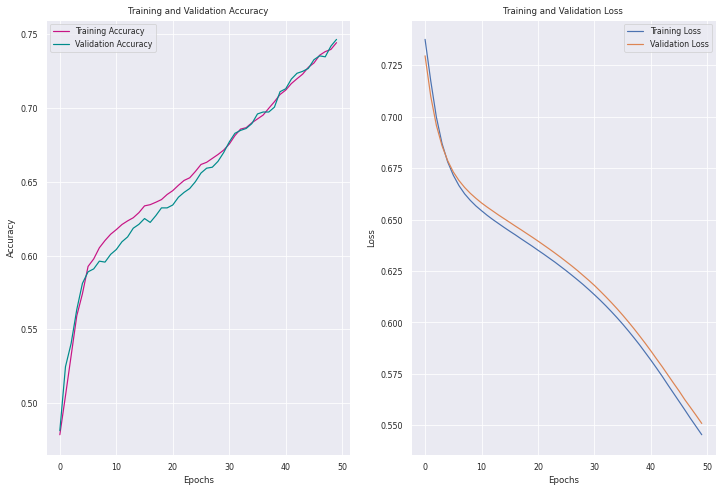

In [61]:
import matplotlib.pyplot as plt

epochs_range = range(EPOCHS)
# epochs_range = range(20)

fig=plt.figure(figsize=(12, 8))

epochs = range(len(simpleRNN_history.epoch))

plt.subplot(1, 2, 1)
plt.plot(epochs, simpleRNN_history.history['accuracy'], label='Training Accuracy', color='mediumvioletred')
plt.plot(epochs, simpleRNN_history.history['val_accuracy'], label='Validation Accuracy', color='darkcyan')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
# plt.ylim([min(plt.ylim()),1])
plt.legend()
plt.grid(True)
plt.title('Training and Validation Accuracy')


plt.subplot(1, 2, 2)
plt.plot(epochs, simpleRNN_history.history['loss'], label='Training Loss')
plt.plot(epochs, simpleRNN_history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.title('Training and Validation Loss')
plt.show()
fig.savefig('simpleRNN_traininghistory.pdf')

In [102]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, roc_curve

from sklearn.metrics import classification_report,confusion_matrix
y_pred = simpleRNN_model.predict(x_valid_pad, verbose=0)
y_pred_classes = simpleRNN_model.predict_classes(x_valid_pad, verbose=0)

y_pred = y_pred[:,0]
y_pred_classes = y_pred_classes[:,0]

rnn_report = classification_report(y_valid, y_pred_classes)
rnn_report1 = classification_report(y_valid, y_pred_classes, output_dict=True)
print('Classification Report of SimpleRNN Model:\n',rnn_report,'\n')
accuracy_scores.append(rnn_report1['accuracy'])
precision_scores.append(rnn_report1['weighted avg']['precision'])
recall_scores.append(rnn_report1['weighted avg']['recall'])
f1_scores.append(rnn_report1['weighted avg']['f1-score'])

Classification Report of SimpleRNN Model:
               precision    recall  f1-score   support

           0       0.76      0.81      0.79       869
           1       0.72      0.66      0.69       654

    accuracy                           0.75      1523
   macro avg       0.74      0.74      0.74      1523
weighted avg       0.75      0.75      0.74      1523
 



In [166]:
labels = ['Disaster', 'Non-Disaster']

rnn_cm = confusion_matrix(y_valid, y_pred_classes)
print(rnn_cm)

[[705 164]
 [222 432]]


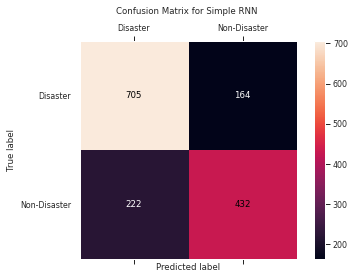

In [184]:
def plot_confusion_matrices(cm):
  fig = plt.figure()
  ax = fig.add_subplot(111)
  im = ax.imshow(cm, interpolation='nearest')
  cax = ax.matshow(cm)
  fig.colorbar(cax)

  ax.set(xticks=np.arange(cm.shape[1]), yticks=np.arange(cm.shape[0]), xticklabels=labels, yticklabels=labels, ylabel='True label', xlabel='Predicted label')
  thresh = cm.max() / 2.
  for i in range(cm.shape[0]):
      for j in range(cm.shape[1]):
          ax.text(j, i, format(cm[i, j]),
                  ha="center", va="center",
                  color="white" if cm[i, j] < thresh else "black")
  plt.grid(None)
  plt.title("Confusion Matrix for Simple RNN \n")
  plt.savefig("cm_simple_rnn.pdf")
  plt.show()

plot_confusion_matrices(rnn_cm)

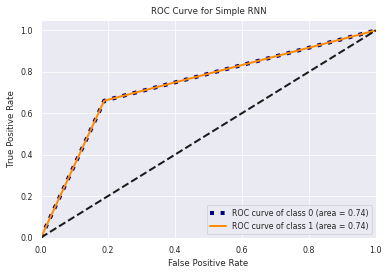

In [185]:
lw = 2
n_classes = 2

fpr = dict()
tpr = dict()
roc_auc = dict()

y_pred_classes = simpleRNN_model.predict_classes(x_valid_pad)[:,0]

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_valid, y_pred_classes)
    roc_auc[i] = roc_auc_score(y_valid, y_pred_classes)

all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))


mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

plt.plot(fpr[0], tpr[0], color='navy', lw=lw, linestyle=':', linewidth=4, label='ROC curve of class 0 (area = {1:0.2f})' ''.format(0, roc_auc[0]))
plt.plot(fpr[1], tpr[1], color='darkorange', lw=lw, label='ROC curve of class 1 (area = {1:0.2f})' ''.format(1, roc_auc[1]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Simple RNN')
plt.legend(loc="lower right")
plt.savefig("roc_simple_rnn.pdf")
plt.show()

#LSTM Model

In [186]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split

x_train, x_valid, y_train, y_valid = train_test_split(train_data['text'].values, train_data['target'].values, 
                                                  stratify=train_data['target'].values, 
                                                  random_state=42, 
                                                  test_size=0.2, shuffle=True)


In [187]:
from keras.preprocessing import sequence, text

lstm_token = text.Tokenizer(num_words=None)
max_len = 1500


lstm_token.fit_on_texts(list(x_train) + list(x_valid))
x_train_seq = lstm_token.texts_to_sequences(x_train)
x_valid_seq = lstm_token.texts_to_sequences(x_valid)

#zero pad the sequences
x_train_pad = sequence.pad_sequences(x_train_seq, maxlen=max_len)
x_valid_pad = sequence.pad_sequences(x_valid_seq, maxlen=max_len)

word_index = lstm_token.word_index

In [188]:
embedding_matrix = np.zeros((len(word_index) + 1, 300))
for word, i in tqdm(word_index.items()):
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

100%|██████████| 22700/22700 [00:00<00:00, 174547.69it/s]


#LSTM Model

In [189]:
import keras
from keras.layers import LSTM, Embedding, Dense, Dropout, SpatialDropout1D, GRU, Activation
from keras.initializers import Constant
from keras import optimizers
from keras.optimizers import Adam, SGD, RMSprop

num_words = len(word_index) + 1
print("num_words:", num_words)

def build_lstm_model():
  model = keras.Sequential()
  model.add(Embedding(len(word_index)+1, 300, weights=[embedding_matrix], input_length=max_len, trainable=False))
  model.add(LSTM(100, dropout=0.3, recurrent_dropout=0.3))
  model.add(Dense(1, activation=tf.nn.sigmoid))
  sgd = optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
  model.compile(loss='binary_crossentropy', optimizer=sgd, metrics=['accuracy'])
  return model

num_words: 22701


In [190]:
lstm_model = build_lstm_model()
lstm_model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, 1500, 300)         6810300   
_________________________________________________________________
lstm (LSTM)                  (None, 100)               160400    
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 101       
Total params: 6,970,801
Trainable params: 160,501
Non-trainable params: 6,810,300
_________________________________________________________________


In [191]:
tf.get_logger().setLevel("ERROR")

print("Strategy Num Replicas", num_replicas)

if tpu:
  BATCH_SIZE = 64 * num_replicas
  print("Batch Size TPU: ",BATCH_SIZE)
else:
  BATCH_SIZE = 512

EPOCHS = 50

lstm_history = lstm_model.fit(x_train_pad, y_train, #y_train
               epochs=EPOCHS, 
               batch_size=BATCH_SIZE,
               validation_data=(x_valid_pad, y_valid), #y_valid
               verbose = 1)


Strategy Num Replicas 8
Batch Size TPU:  512
Epoch 1/50
12/12 [==============================] - 73s 6s/step - loss: 0.7081 - accuracy: 0.4622 - val_loss: 0.6772 - val_accuracy: 0.5699
Epoch 2/50
12/12 [==============================] - 71s 6s/step - loss: 0.6668 - accuracy: 0.5726 - val_loss: 0.6521 - val_accuracy: 0.5732
Epoch 3/50
12/12 [==============================] - 71s 6s/step - loss: 0.6480 - accuracy: 0.6186 - val_loss: 0.6370 - val_accuracy: 0.6559
Epoch 4/50
12/12 [==============================] - 71s 6s/step - loss: 0.6369 - accuracy: 0.6448 - val_loss: 0.6280 - val_accuracy: 0.6474
Epoch 5/50
12/12 [==============================] - 72s 6s/step - loss: 0.6301 - accuracy: 0.6522 - val_loss: 0.6191 - val_accuracy: 0.6520
Epoch 6/50
12/12 [==============================] - 71s 6s/step - loss: 0.6243 - accuracy: 0.6598 - val_loss: 0.6089 - val_accuracy: 0.6717
Epoch 7/50
12/12 [==============================] - 71s 6s/step - loss: 0.6126 - accuracy: 0.6793 - val_loss: 0.595

In [212]:
import pickle

lstm_model.save('lstm_model.h5')

with open('lstm_tokenizer.pickle', 'wb') as handle:
    pickle.dump(lstm_token, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [213]:
import pandas as pd

lstm_hist = pd.DataFrame(lstm_history.history)
lstm_hist['epoch'] = lstm_history.epoch
lstm_hist.head(10)

,loss,accuracy,val_loss,val_accuracy,epoch
0,0.708122,0.462233,0.677198,0.569928,0
1,0.666775,0.572578,0.652131,0.573211,1
2,0.647985,0.618555,0.637013,0.655942,2
3,0.636890,0.644828,0.628001,0.647406,3
4,0.630065,0.652217,0.619136,0.652003,4
5,0.624330,0.659770,0.608867,0.671701,5
6,0.612604,0.679310,0.595157,0.692712,6
7,0.600881,0.693268,0.576118,0.721602,7
8,0.584853,0.715599,0.549041,0.758372,8
9,0.558863,0.746141,0.511709,0.783979,9


In [214]:
# test data for test_accuracy
loss, accuracy = lstm_model.evaluate(x_train_pad, y_train, verbose=False)
print("LSTM Training Accuracy: {:.4f} %".format(accuracy*100))

val_loss, val_accuracy = lstm_model.evaluate(x_valid_pad, y_valid, verbose=False)
print("LSTM Validation Accuracy:  {:.4f} %".format(val_accuracy*100))


LSTM Training Accuracy: 83.2184 %
LSTM Validation Accuracy:  82.7314 %


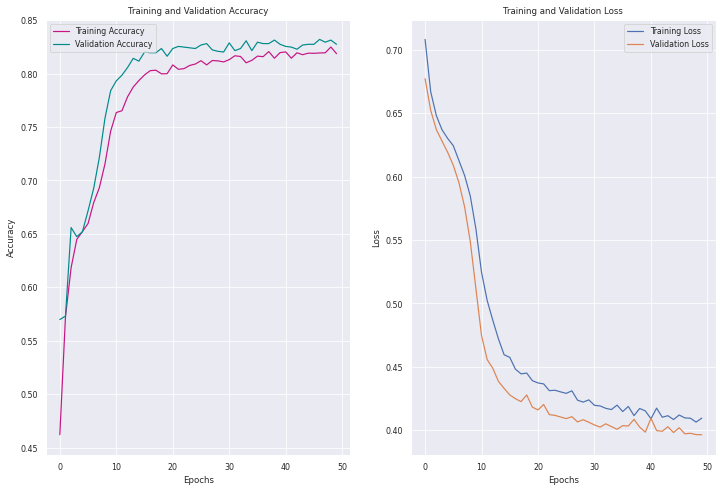

In [215]:
import matplotlib.pyplot as plt

epochs_range = range(EPOCHS)
# epochs_range = range(20)

fig=plt.figure(figsize=(12, 8))

plt.subplot(1, 2, 1)
plt.plot(epochs_range, lstm_history.history['accuracy'], label='Training Accuracy', color='mediumvioletred')
plt.plot(epochs_range, lstm_history.history['val_accuracy'], label='Validation Accuracy', color='darkcyan')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
# plt.ylim([min(plt.ylim()),1])
plt.legend()
plt.grid(True)
plt.title('Training and Validation Accuracy')


plt.subplot(1, 2, 2)
plt.plot(epochs_range, lstm_history.history['loss'], label='Training Loss')
plt.plot(epochs_range, lstm_history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.title('Training and Validation Loss')
plt.show()
fig.savefig('lstm_traininghistory.pdf')

In [201]:
# from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, roc_curve

# y_pred = lstm_model.predict(x_valid_pad, verbose=0)
# y_pred_classes = lstm_model.predict_classes(x_valid_pad, verbose=0)

# y_pred = y_pred[:,0]
# y_pred_classes = y_pred_classes[:,0]

# lstm_accuracy = accuracy_score(y_valid, y_pred_classes)
# print('Accuracy: %f' % lstm_accuracy)

# # precision tp / (tp + fp)
# lstm_precision = precision_score(y_valid, y_pred_classes)
# print('Precision: %f' % lstm_precision)

# # recall: tp / (tp + fn)
# lstm_recall = recall_score(y_valid, y_pred_classes)
# print('Recall: %f' % lstm_recall)

# # f1: 2 tp / (2 tp + fp + fn)
# lstm_f1 = f1_score(y_valid, y_pred_classes)
# print('F1 score: %f' % lstm_f1)

# #area under roc
# lstm_auc = roc_auc_score(y_valid, y_pred)
# print('Area under ROC (auc)' % lstm_auc)

# # confusion matrix
# matrix = confusion_matrix(y_valid, y_pred_classes)
# print(matrix)


# # y_pred1 = model.predict_proba(x_valid_pad)
# # print("roc evaluated with scikit = ",roc_curve(y_valid, y_pred))

In [202]:
# from sklearn.metrics import classification_report,confusion_matrix
# y_pred = lstm_model.predict(x_valid_pad, verbose=0)
# y_pred_classes = lstm_model.predict_classes(x_valid_pad, verbose=0)

# y_pred = y_pred[:,0]
# y_pred_classes = y_pred_classes[:,0]

# print('  Classification Report:\n',classification_report(y_valid, y_pred_classes),'\n')

In [216]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, roc_curve

from sklearn.metrics import classification_report,confusion_matrix
y_pred = lstm_model.predict(x_valid_pad, verbose=0)
y_pred_classes_lstm = lstm_model.predict_classes(x_valid_pad, verbose=0)

y_pred = y_pred[:,0]
y_pred_classes_lstm = y_pred_classes_lstm[:,0]

lstm_report = classification_report(y_valid, y_pred_classes_lstm)
lstm_report1 = classification_report(y_valid, y_pred_classes_lstm, output_dict=True)
print('Classification Report of LSTM Model:\n',lstm_report,'\n')
accuracy_scores.append(lstm_report1['accuracy'])
precision_scores.append(lstm_report1['weighted avg']['precision'])
recall_scores.append(lstm_report1['weighted avg']['recall'])
f1_scores.append(lstm_report1['weighted avg']['f1-score'])

Classification Report of LSTM Model:
               precision    recall  f1-score   support

           0       0.82      0.90      0.86       869
           1       0.84      0.73      0.78       654

    accuracy                           0.83      1523
   macro avg       0.83      0.82      0.82      1523
weighted avg       0.83      0.83      0.83      1523
 



In [217]:
labels = ['Disaster', 'Non-Disaster']

lstm_cm = confusion_matrix(y_valid, y_pred_classes_lstm)
print(lstm_cm)

[[781  88]
 [175 479]]


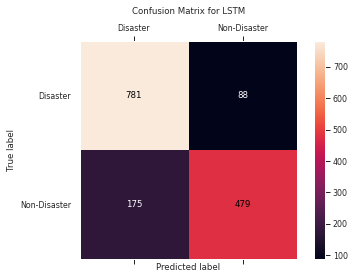

In [218]:
def plot_confusion_matrices(cm):
  fig = plt.figure()
  ax = fig.add_subplot(111)
  im = ax.imshow(cm, interpolation='nearest')
  cax = ax.matshow(cm)
  fig.colorbar(cax)

  ax.set(xticks=np.arange(cm.shape[1]), yticks=np.arange(cm.shape[0]), xticklabels=labels, yticklabels=labels, ylabel='True label', xlabel='Predicted label')
  thresh = cm.max() / 2.
  for i in range(cm.shape[0]):
      for j in range(cm.shape[1]):
          ax.text(j, i, format(cm[i, j]),
                  ha="center", va="center",
                  color="white" if cm[i, j] < thresh else "black")
  plt.grid(None)
  plt.title("Confusion Matrix for LSTM\n")
  plt.savefig("cm_simple_rnn.pdf")
  plt.show()

plot_confusion_matrices(lstm_cm)

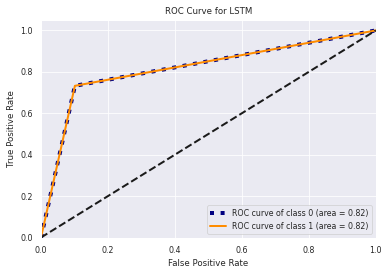

In [220]:
lw = 2
n_classes = 2

fpr = dict()
tpr = dict()
roc_auc = dict()

y_pred_classes = lstm_model.predict_classes(x_valid_pad)[:,0]

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_valid, y_pred_classes_lstm)
    roc_auc[i] = roc_auc_score(y_valid, y_pred_classes_lstm)

all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))


mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

plt.plot(fpr[0], tpr[0], color='navy', lw=lw, linestyle=':', linewidth=4, label='ROC curve of class 0 (area = {1:0.2f})' ''.format(0, roc_auc[0]))
plt.plot(fpr[1], tpr[1], color='darkorange', lw=lw, label='ROC curve of class 1 (area = {1:0.2f})' ''.format(1, roc_auc[1]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for LSTM')
plt.legend(loc="lower right")
plt.savefig("roc_lstm.pdf")
plt.show()

In [222]:
from keras.preprocessing import sequence, text
from keras.models import model_from_json, load_model

txt=test_data['text'][:10]

with open('lstm_tokenizer.pickle', 'rb') as handle:
    loaded_tokenizer = pickle.load(handle)

loaded_model = load_model('lstm_model.h5')

for i in txt:
  seq= loaded_tokenizer.texts_to_sequences([i])
  padded = sequence.pad_sequences(seq, maxlen=max_len)
  pred = loaded_model.predict_classes(padded)
  print(i, ":", pred)

Just happened a terrible car crash : [[1]]
Heard about #earthquake is different cities, stay safe everyone. : [[1]]
there is a forest fire at spot pond, geese are fleeing across the street, I cannot save them all : [[1]]
Apocalypse lighting. #Spokane #wildfires : [[1]]
Typhoon Soudelor kills 28 in China and Taiwan : [[1]]
We're shaking...It's an earthquake : [[0]]
They'd probably still show more life than Arsenal did yesterday, eh? EH? : [[0]]
Hey! How are you? : [[0]]
What a nice hat? : [[0]]
Fuck off! : [[0]]


In [223]:
lstm_model.save_weights('lstm_model.h5')

with open('lstm_model_arch.json', 'w') as f:
    f.write(lstm_model.to_json())


In [224]:
with open('lstm_model_arch.json', 'r') as f:
    new_lstm_model_1 = model_from_json(f.read())

new_lstm_model_1.load_weights('lstm_model.h5')

In [227]:
i = "Just happened a terrible plane crash"
j = "How are you"

txt=test_data['text'][21:26]

for j in txt:
  seq= loaded_tokenizer.texts_to_sequences([j])
  padded = sequence.pad_sequences(seq, maxlen=max_len)
  pred = new_lstm_model_1.predict_classes(padded)
  print(j, ":", pred)

Burning Man Ablaze! by Turban Diva http://t.co/hodWosAmWS via @Etsy : [[1]]
Not a diss song. People will take 1 thing and run with it. Smh it's an eye opener though. He is about 2 set the game ablaze @CyhiThePrynce : [[0]]
Rape victim dies as she sets herself ablaze: A 16-year-old girl died of burn injuries as she set herself ablazeÛ_ http://t.co/UK8hNrbOob : [[1]]
SETTING MYSELF ABLAZE http://t.co/6vMe7P5XhC : [[0]]
@CTVToronto the bins in front of the field by my house wer set ablaze the other day flames went rite up the hydro pole wonder if it was him : [[0]]


#References

In [ ]:
# https://www.kaggle.com/sagaramu/nlp-disaster-adding-features-and-visualization
# https://www.kaggle.com/teyang/twitter-disaster-eda-clean-feature-engineer
# https://towardsdatascience.com/sentiment-analysis-with-python-part-2-4f71e7bde59a
# https://github.com/samiramunir/Simple-Sentiment-Analysis-using-NLTK/blob/master/Sentiment_Analysis.ipynb
# https://www.kaggle.com/tanulsingh077/deep-learning-for-nlp-zero-to-transformers-bert
